In [1]:
import os
import numpy as np
from PIL import Image

#define folder path
path = 'Kather_texture_2016_larger_images_10/'

#Load the 10 large images from folder path
images = np.array([np.array(Image.open(path + fname)) for fname in os.listdir(path)])


In [2]:
 #define folder paths for smaller images,for each class
TUMOR_path = 'Kather_texture_2016_image_tiles_5000/01_TUMOR/'
STROMA_path = 'Kather_texture_2016_image_tiles_5000/02_STROMA/'
COMPLEX_path = 'Kather_texture_2016_image_tiles_5000/03_COMPLEX/'
LYMPHO_path = 'Kather_texture_2016_image_tiles_5000/04_LYMPHO/'
DEBRIS_path = 'Kather_texture_2016_image_tiles_5000/05_DEBRIS/'
MUCOSA_path= 'Kather_texture_2016_image_tiles_5000/06_MUCOSA/'
ADIPOSE_path = 'Kather_texture_2016_image_tiles_5000/07_ADIPOSE/'
EMPTY_path = 'Kather_texture_2016_image_tiles_5000/08_EMPTY/'

#Load the images from each folder path
TUMOR = np.array([np.array(Image.open(TUMOR_path + fname)) for fname in os.listdir(TUMOR_path)])
STROMA = np.array([np.array(Image.open(STROMA_path + fname)) for fname in os.listdir(STROMA_path)])
COMPLEX = np.array([np.array(Image.open(COMPLEX_path + fname)) for fname in os.listdir(COMPLEX_path)])
LYMPHO = np.array([np.array(Image.open(LYMPHO_path + fname)) for fname in os.listdir(LYMPHO_path)])
DEBRIS = np.array([np.array(Image.open(DEBRIS_path + fname)) for fname in os.listdir(DEBRIS_path)])
MUCOSA = np.array([np.array(Image.open(MUCOSA_path + fname)) for fname in os.listdir(MUCOSA_path)])
ADIPOSE = np.array([np.array(Image.open(ADIPOSE_path + fname)) for fname in os.listdir(ADIPOSE_path)])
EMPTY = np.array([np.array(Image.open(EMPTY_path + fname)) for fname in os.listdir(EMPTY_path)])

#Create the labels for each image so we know which image belongs to which class
TUMOR_labels = np.ones((len(TUMOR),1))
STROMA_labels = np.ones((len(STROMA),1))*2
COMPLEX_labels = np.ones((len(COMPLEX),1))*3
LYMPHO_labels = np.ones((len(LYMPHO),1))*4
DEBRIS_labels = np.ones((len(DEBRIS),1))*5
MUCOSA_labels = np.ones((len(MUCOSA),1))*6
ADIPOSE_labels = np.ones((len(ADIPOSE),1))*7
EMPTY_labels = np.ones((len(EMPTY),1))*8

In [4]:
#perform t-sne on the 8 classes of smaller images
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

#concatenate all the images and labels
X = np.concatenate((TUMOR,STROMA,COMPLEX,LYMPHO,DEBRIS,MUCOSA,ADIPOSE,EMPTY),axis=0)
y = np.concatenate((TUMOR_labels,STROMA_labels,COMPLEX_labels,LYMPHO_labels,DEBRIS_labels,MUCOSA_labels,ADIPOSE_labels,EMPTY_labels),axis=0)

#perform t-sne on the 8 classes of smaller images
tsne = TSNE(n_components=2, random_state=0)
X_2d = tsne.fit_transform(X.reshape(X.shape[0],-1))



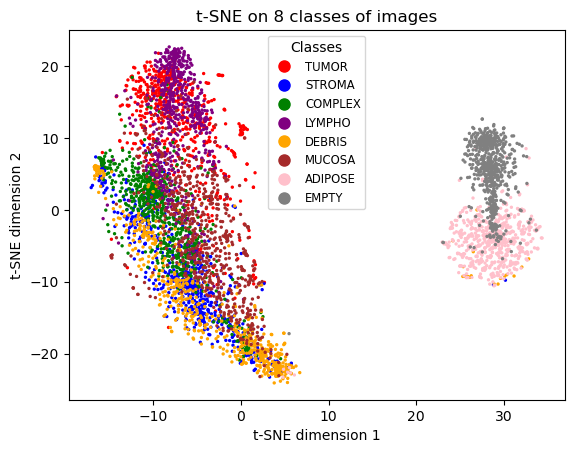

In [32]:
from matplotlib.colors import ListedColormap

# create a color map for each class label
class_labels = ['TUMOR', 'STROMA', 'COMPLEX', 'LYMPHO', 'DEBRIS', 'MUCOSA', 'ADIPOSE', 'EMPTY']
colors = ['red', 'blue', 'green', 'purple', 'orange', 'brown', 'pink', 'gray']
class_cmap = ListedColormap(colors[:len(class_labels)])

plt.scatter(X_2d[:,0],X_2d[:,1],c=y,cmap=class_cmap,s=2)
#add labels to the plot
plt.xlabel('t-SNE dimension 1')
plt.ylabel('t-SNE dimension 2')
plt.title('t-SNE on 8 classes of images')
# create legend with color handles and class labels
handles = [plt.plot([],[],color=colors[i], marker="o", ls="", markersize=8)[0] for i in range(len(class_labels))]
plt.legend(handles, class_labels, loc='best', title='Classes',fontsize='small')

plt.show()


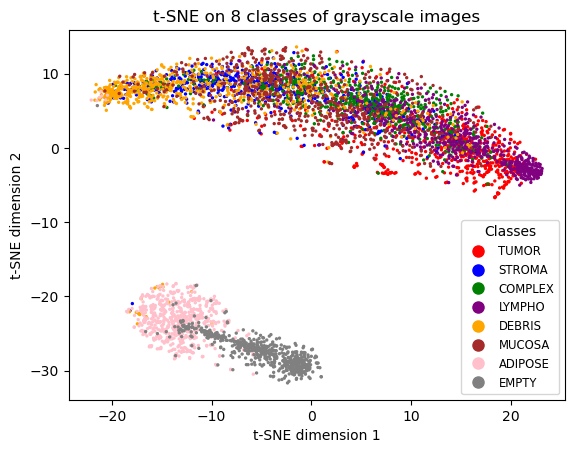

In [33]:
#convert images to grayscale
X_gray = np.array([np.array(Image.fromarray(image).convert('L')) for image in X])

#perform t-sne on the grayscale images
tsne = TSNE(n_components=2, random_state=0)
X_2d = tsne.fit_transform(X_gray.reshape(X_gray.shape[0],-1))

#plot t-sne results
plt.scatter(X_2d[:,0],X_2d[:,1],c=y,cmap=class_cmap,s=2)
#add labels to the plot
plt.xlabel('t-SNE dimension 1')
plt.ylabel('t-SNE dimension 2')
plt.title('t-SNE on 8 classes of grayscale images')
# create legend with color handles and class labels
handles = [plt.plot([],[],color=colors[i], marker="o", ls="", markersize=8)[0] for i in range(len(class_labels))]
plt.legend(handles, class_labels, loc='best', title='Classes',fontsize='small')

plt.show()

In [34]:
images.shape


(10, 5000, 5000, 3)

Let's use k-menas clustering on hte unsupervised images to see how many clusters we get - there are 8 classes so we'd expect there to be around 8 clusters.


In [35]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import colors
from skimage.color import rgb2gray, rgb2hsv, hsv2rgb
from skimage.io import imread, imshow
from sklearn.cluster import KMeans

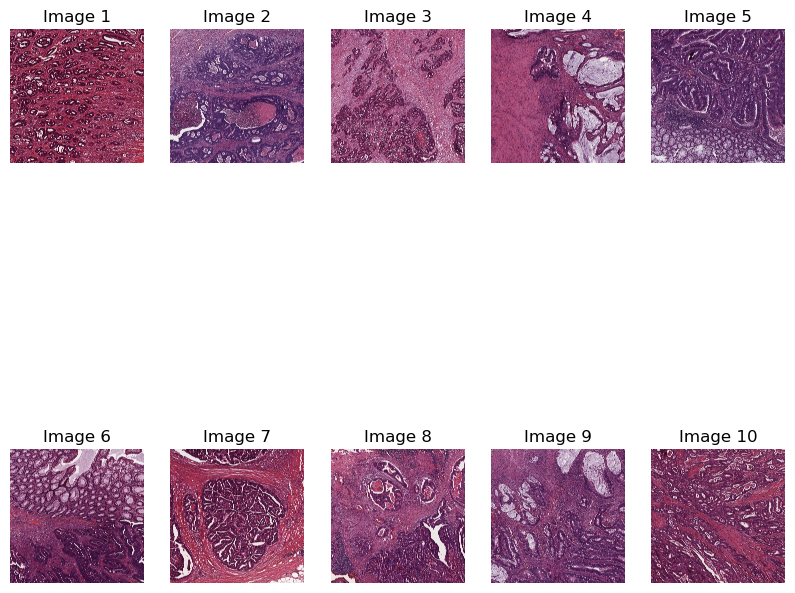

In [38]:
#plot each of the 10 images in the images array
fig = plt.figure(figsize=(10,10))
for i in range(10):
    ax = fig.add_subplot(2,5,i+1)
    ax.imshow(images[i])
    ax.set_title('Image {}'.format(i+1))
    ax.axis('off')
plt.show()

In [39]:
images.shape

(10, 5000, 5000, 3)

In [40]:
#apply k-means to first image, from 1 to 10 clusters
fig = plt.figure(figsize=(10,10))
for i in range(10):
    ax = fig.add_subplot(2,5,i+1)
    kmeans = KMeans(n_clusters=i+1, random_state=0).fit(images[0].reshape(-1,3))
    ax.imshow(kmeans.cluster_centers_[kmeans.labels_].reshape(images[0].shape))
    ax.set_title('{} clusters'.format(i+1))
    ax.axis('off')
plt.show()

#plot the elbow plot for the first image
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)
ax.plot(range(1,11),[KMeans(n_clusters=i, random_state=0).fit(images[0].reshape(-1,3)).inertia_ for i in range(1,11)])
ax.set_title('Elbow plot for image 1')
ax.set_xlabel('Number of clusters')
ax.set_ylabel('Inertia')
plt.show()

#plot the first image and the first image coloured by the optimal number of clusters
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,2,1)
ax.imshow(images[0])
ax.set_title('Image 1')
ax.axis('off')
ax = fig.add_subplot(1,2,2)





c:\Users\james\anaconda3\envs\tf\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\james\anaconda3\envs\tf\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [ ]:
#perform k-means clustering with 4 clusters for the first image
kmeans = KMeans(n_clusters=4, random_state=0).fit(images[0].reshape(-1,3))
#reshape the labels to the shape of the image
labels = kmeans.labels_.reshape(images[0].shape[0],images[0].shape[1])
#plot the image and the labels
ax.imshow(labels)
ax.set_title('Image 1 coloured by clusters')
ax.axis('off')
plt.show()

#plot the first image and the first image coloured by the optimal number of clusters
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,2,1)
ax.imshow(images[0])
ax.set_title('Image 1')
ax.axis('off')
ax = fig.add_subplot(1,2,2)
#perform k-means clustering with 4 clusters for the first image
kmeans = KMeans(n_clusters=4, random_state=0).fit(images[0].reshape(-1,3))
#reshape the labels to the shape of the image
labels = kmeans.labels_.reshape(images[0].shape[0],images[0].shape[1])

